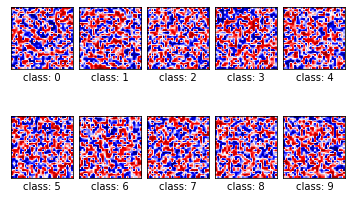

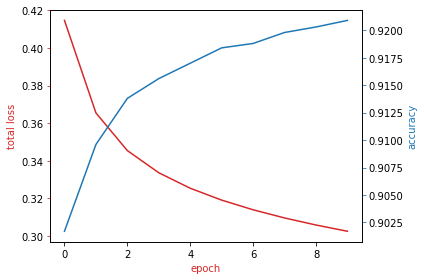

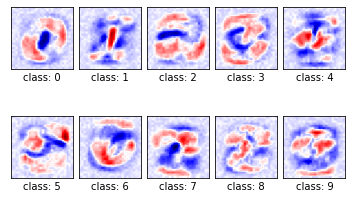

Final Accuracy 0.9209


In [22]:
import torch
from torch import nn, optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np


# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()


def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28,28),cmap='gray')
  plt.title('y = ' + str(data_sample[1]))

train_data = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
validation_data = dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

class Soft_Max(nn.Module):
  def __init__(self,in_, out_):
    super(Soft_Max,self).__init__()
    self.linear = nn.Linear(in_,out_)

  def forward(self,x):
    yhat = self.linear(x)
    return yhat

input_ = 28*28
output_ = 10

my_model = Soft_Max(input_,output_)
PlotParameters(my_model)
optimizer = optim.SGD(my_model.parameters(),lr=0.1)
train_loader = DataLoader(dataset=train_data, batch_size=100)
valid_loader = DataLoader(dataset=validation_data, batch_size=5000)
criterion = nn.CrossEntropyLoss()
LOSS=[]
ACC = []
def train_model(iter):
  for epoch in range(iter):
    
    for x,y in train_loader:
      yhat = my_model(x.view(-1,input_))
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


    correct=0

    for x,y in valid_loader:
      z = my_model(x.view(-1,input_))
      _,yhat = torch.max(z,1)
      correct+= (yhat == y).sum().item()
    accuracy = correct/len(validation_data)
    LOSS.append(loss.data)
    ACC.append(accuracy)



train_model(10)


# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(LOSS,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( ACC, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()



PlotParameters(my_model)

correct =0
for x,y in validation_data:
  z = my_model(x.view(-1,input_))
  _,yhat = torch.max(z,1)
  correct+= (yhat ==y).sum().item()

accuracy = correct/len(validation_data)
print('Final Accuracy',accuracy)